# TP noté -- Statistical models for decision making - partie 2

Cet devoir noté est composé de deux exercices. Il sera idéalement réalisé en binome et éventuellement seul. Les réponses seront données dans un notebook qui indiquera clairement les **noms et prénoms des élèves** l'ayant realisé.


## Exercice 1

Nous souhaitons évaluer si un nouveau produit a un effet significatif sur le rendement de moteurs. Pour y répondre, ce rendement (*Efficiency*) a été mesuré sur deux types de moteurs (*Brand_1* et *Brand_2*) et en testant différents niveaux de concentration (*Concentration*) du produit. Les observations sont dans le fichier *E2_Efficiency_Obs.csv*. Plus spécifiquement, nous nous demandons :
- Le produit semble-t-il avoir un effet ?
- Cet effet est-il différent en fonction de la marque du moteur ?
- Cet effet dépend-il de la concentration du produit ?

### Question 1.1 

Ouvrez et observez les données. A leur vue, quelle vous semble être la réponse aux trois questions posées plus haut ?

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


dataframe=pandas.read_csv("./E1_Efficiency_Obs.csv",sep=',')

In [ ]:
# Show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
dataframe.sort_values(by=['Efficiency'], ascending=False, inplace=True)
display(dataframe)


Les deux marques bénéficient d'une augmenntation de la concentration du produit pour augmenter l'efficacité.

### Question 1.2 

Afin de répondre aux questions, deux hypothèses sont formulées :
- Pour chaque marque de moteur, la relation entre la concentration et le rendement est supposée linéaire.
- La distribution du bruit des observations est supposé suivre une loi Normale centrée.

Quelle démarche de modélisation statistique allez-vous utiliser pour répondre aux trois questions posées en introduction ? Une fois la démarche bien expliquée, testez la sur les données observées afin de conclure sur l'efficacité du produit.

Puisque la relation est supposée linéaire et que le bruit est supposé suivre une loie normale centrée, nous allons faire une régression linéaire pour chaque marque. 

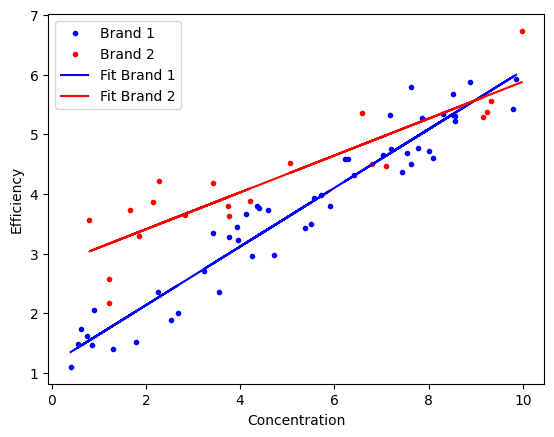

MSE Brand 1: 0.12887409752130746
MSE Brand 2: 0.22160576132586685


In [25]:
from sklearn.linear_model import LinearRegression

# seperate the data by brand
df_brand1 = dataframe[dataframe['Brand'] == 'Brand_1']
df_brand2 = dataframe[dataframe['Brand'] == 'Brand_2']


# fit a linear regression model for each brand
lr1=LinearRegression()
lr1.fit(df_brand1[['Concentration']],df_brand1[['Efficiency']])

lr2=LinearRegression()
lr2.fit(df_brand2[['Concentration']],df_brand2[['Efficiency']])

# show the results
plt.figure()
plt.plot(df_brand1[['Concentration']],df_brand1[['Efficiency']],'b.',label='Brand 1')
plt.plot(df_brand2[['Concentration']],df_brand2[['Efficiency']],'r.',label='Brand 2')
plt.plot(df_brand1[['Concentration']],lr1.predict(df_brand1[['Concentration']]),'b-',label='Fit Brand 1')
plt.plot(df_brand2[['Concentration']],lr2.predict(df_brand2[['Concentration']]),'r-',label='Fit Brand 2')
plt.xlabel('Concentration')
plt.ylabel('Efficiency')
plt.legend()
plt.show()

mse_brand1 = np.mean((df_brand1[['Efficiency']] - lr1.predict(df_brand1[['Concentration']]))**2)
mse_brand2 = np.mean((df_brand2[['Efficiency']] - lr2.predict(df_brand2[['Concentration']]))**2)

print("MSE Brand 1:", mse_brand1)
print("MSE Brand 2:", mse_brand2)


On observe que pour les deux marques, il y a une relation linéaire positive. La pente est plus forte pour la marque 1 mais à faible concentration, la marque 2 est plus efficace.
On remarque aussi qu'il y a moins de données pour la marque 2 et sa MSE est plus importante que celle de la marque 1. La régression est donc meilleure pour la marque 1.

## Exercice 2


Afin d'estimer efficacement le niveau de fatigue des ailes d'un d'avion au cours des années, il a été proposé de lancer une étude pour évaluer s'il était possible de déduire le niveau de stress subit par les ailes de l'avion lors de phases de vols diverses avec de données capteurs acquises en routine pendant les vols. Une personne ayant une expertise mécanique sur le modèle d'avion étudié a alors quantifié le niveau de stress subi par les ailes dans différentes phases de vols et différents contextes. Nous allons mettre en lien ces niveaux de stress avec des données capteurs acquises au même moment que les annotations. Nous allons pour cela utiliser la régression linaire. 


### QUESTION 2.1

Les données d'apprentissage sont dans les fichiers *E2_sensor_vals.csv* et *E2_stress_vals.csv*. Ouvrez ces fichiers et mettez les données dans des numpy arrays ou des pandas dataframes *X* et *Y*. Représentez alors le lien entre les valeurs issues de chaque capteur et le niveau de stress dans des nuages de points 2D. Identifiez-vous des relations entre des données capteur et le niveau de stress ? Quels capteurs vous paraissent être les plus pertinents.
 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


X=pd.read_csv("E2_sensor_vals.csv",sep=';')

Y=pd.read_csv("E2_stress_vals.csv",sep=';')

# plot each stress value against each sensor value
for i in range(X.shape[1]):
    plt.plot(X.iloc[:,i],Y,'bo')
    plt.xlabel('Sensor'+str(i+1))
    plt.ylabel('Stress')
    plt.show()


### QUESTION 2.2
On se demande s'il est possible de prédire le niveau de stress à partir d'**une seule** des variables *sensor_01*, *sensor_12* ou *sensor_15*.


#### QUESTION 2.2.1

Effectuez une régression linéaire simple entre chacune de ces trois variables et le niveau de stress. Quelle stratégie de validation croisée vous semble être la plus adaptée sur ce jeu de données ?


#### QUESTION 2.2.2

Peut-on statistiquement affirmer qu'il existe une relation significative entre le niveau de stress et (indépendament) *sensor_01*, *sensor_12* ou bien *sensor_15* ? Si oui, décrivez votre procédure de test.


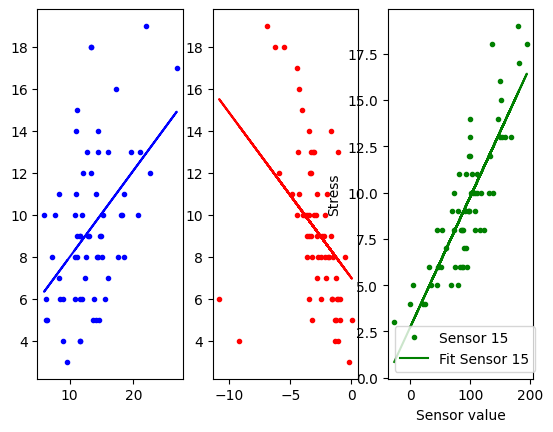

In [49]:
# question 2.2.1
lr_1=LinearRegression()
lr_1.fit(X[['sensor_01']],Y)

lr_12=LinearRegression()
lr_12.fit(X[['sensor_12']],Y)

lr_15=LinearRegression()
lr_15.fit(X[['sensor_15']],Y)

plt.figure ()
subplot=plt.subplot(1,3,1)
plt.plot(X[['sensor_01']],Y,'b.',label='Sensor 1')
plt.plot(X[['sensor_01']],lr_1.predict(X[['sensor_01']]),'b-',label='Fit Sensor 1')
subplot=plt.subplot(1,3,2)
plt.plot(X[['sensor_12']],Y,'r.',label='Sensor 12')
plt.plot(X[['sensor_12']],lr_12.predict(X[['sensor_12']]),'r-',label='Fit Sensor 12')
subplot=plt.subplot(1,3,3)
plt.plot(X[['sensor_15']],Y,'g.',label='Sensor 15')
plt.plot(X[['sensor_15']],lr_15.predict(X[['sensor_15']]),'g-',label='Fit Sensor 15')
plt.xlabel('Sensor value')
plt.ylabel('Stress')
plt.legend()
plt.show()


### QUESTION 2.3

On s'intéresse maintenant au lien entre la variable *sensor_12* et le niveau de stress. On peut remarquer qu'il semble exister une relation linéaire entre ces variables, mais que les données contiennent aussi deux valeurs aberrantes.


#### QUESTION 2.3.1

**Stratégie 1** : Quelle stratégie utiliseriez vous pour détecter automatiquement des données aberrantes dans un jeu de données ?

#### QUESTION 2.3.2

**Stratégie 2** : Nous allons ici utiliser toutes les observations pour l'apprentissage du modèle linéaire et sa validation. En supposant que les erreurs de prédiction suivent une loi normale centrée, pourrait-on aussi détecter les outliers à partir d'un test d'hypothèse. Si oui, décrivez la procédure.



### QUESTION 2.4


Nous supprimerons dans cette question les deux observations qui sont aberrantes sur la variable *sensor_12*.

Nous souhaitons maintenant sélectionner automatiquement un nombre réduit, mais supérieur à 1, de capteurs qui nous permettraient de prédire au mieux le niveau de stress. Nous allons pour cela utiliser la régression multiple avec un terme de régularisation.

#### QUESTION 2.4.1

Avant d'effectuer une régression linéaire régularisée, il est vivement conseillé d'effectuer une étape de centrage réduction des données. Pourquoi ?


#### QUESTION 2.4.2

Décrivez votre démarche de sélection de variables et vos résultats. Est-ce que l'utilisation des données capteurs vous semble fiable ? 


#### QUESTION 2.4.3

Quelle démarche auriez-vous pour rendre compte des résultats de cette étude sachant que les données contenaient tout de même deux outliers ?

